<a href="https://colab.research.google.com/github/zubrist/Machine-Learning/blob/main/K_Means(tsne_scores_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/tsne_scores.csv")

### **1.Data Exploration**

In [ ]:
data.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


In [ ]:
data.shape

(4406, 2)

### **2.Data Preprocessing**

In [ ]:
X = data[['t-SNE-1', 't-SNE-2']]
kmeans = KMeans(n_clusters = 2, random_state = 12)
model = kmeans.fit(X)

### **3.Model**

In [ ]:
cluster_labels = kmeans.predict(X)
X['Cluster'] = cluster_labels
print(X)
C = kmeans.cluster_centers_
sil = silhouette_score(X, cluster_labels, metric='euclidean',sample_size = len(data))
print(C)


        t-SNE-1    t-SNE-2  Cluster
0     10.846841 -16.712580        0
1     24.794334 -16.775398        0
2      2.953309  13.379048        0
3     27.262146 -31.886690        0
4    -23.015728  64.468376        1
...         ...        ...      ...
4401 -15.211057 -69.717155        1
4402  -9.403443 -62.847458        1
4403 -17.546083 -10.295582        1
4404  -8.512799  16.375420        1
4405 -17.493050  -2.631812        1

[4406 rows x 3 columns]
[[ 36.68677954  -2.4192481 ]
 [-33.72994804   5.05631402]]


### **4.Performance Analysis**

In [ ]:
print("Quality of Clustering: ", sil)

Quality of Clustering:  0.3897104425770257


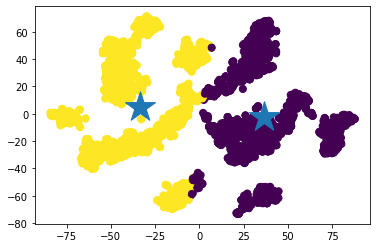

In [ ]:
#For 2-D plot of the data points along with the centroids …
fig = plt.figure()
plt.scatter(X['t-SNE-1'], X['t-SNE-2'], c=cluster_labels,
            s=50, cmap='viridis');
plt.scatter(C[:, 0], C[:, 1], marker='*', s=1000)

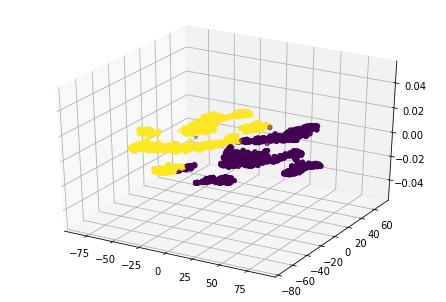

In [ ]:
#For 3-D plot of the data points along with the centroids …
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X['t-SNE-1'], X['t-SNE-2'], 
           c=cluster_labels,
          cmap='viridis');
ax.scatter(C[:, 0], C[:, 1] ,
           marker='*', 
           c='#050505')